<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 2</h1>

In [43]:
import time
import numpy as np
import numba as nb
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Numpy basics</h1>

NumPy (Numerical Python) è una libreria Python che consente di lavorare in modo efficiente con array, matrici e operazioni matematiche. In questo esercizio siamo interessati a prendere dimestichezza con gli array e con il concetto di deep copy. Nel python l'operazione 

```python
b = a
```

non produce una copia, ma  due oggetti coincidono (sono lo stesso array). Per separare le celle di memoria è necessario utilizzare il metodo copy, usando quindi:

```python
c = a.copy()
```

In [2]:
a = np.array([[0.5, -1], [-1, 2]], dtype=np.float32)

# Verifico caratteristiche dell'array
print("Vettore di partenza: \n")
print("Forma del contenitore: ", a.shape)
print("Rango tensore: ", a.ndim)
print("Tipo di dati contenuti: ", a.dtype)


# Utilizzo della funzione flatten, con creazione di deep copy
b = a.copy().flatten()
print("\n\nDeep copy con flattening: \n")
print("Forma del contenitore: ", b.shape)
print("Rango tensore: ", b.ndim)
print("Tipo di dati contenuti: ", b.dtype)


# Assegno zero a indici pari
print("\n\nA zero caselle pari: \n")
print("Vettore prima dell'operazione: ", b)
b[::2] = 0
print("Vettore dopo l'operazione: ", b)

Vettore di partenza: 

Forma del contenitore:  (2, 2)
Rango tensore:  2
Tipo di dati contenuti:  float32


Deep copy con flattening: 

Forma del contenitore:  (4,)
Rango tensore:  1
Tipo di dati contenuti:  float32


A zero caselle pari: 

Vettore prima dell'operazione:  [ 0.5 -1.  -1.   2. ]
Vettore dopo l'operazione:  [ 0. -1.  0.  2.]


In [3]:
a = np.array([1, 2, 3, 4], dtype=np.float32) #dtype mi consente di specificare tipo di dati

# Esempio di "memoria condivisa" (no deep copy)
# Agisco su a, ma l'effetto è evidente anche su b
b = a
print("Esempio copia:\n")

print("Primo vettore pre-operazione: ", a)
print("Secondo vettore pre-operazione: ", b)

a[1] = 1
print("\nPrimo vettore post-operazione: ", a)
print("Secondo vettore post-operazione: ", b)



# Esempio di deep copy (oggetti distinti)
# Agisco su a, ma l'effetto non è evidente su c
c = a.copy()
print("\n\n\nEsempio deep-copy:")

print("Primo vettore pre-operazione: ", a)
print("Secondo vettore pre-operazione: ", c)

a[1] = 2
print("\nPrimo vettore post-operazione: ", a)
print("Secondo vettore post-operazione: ", c)

Esempio copia:

Primo vettore pre-operazione:  [1. 2. 3. 4.]
Secondo vettore pre-operazione:  [1. 2. 3. 4.]

Primo vettore post-operazione:  [1. 1. 3. 4.]
Secondo vettore post-operazione:  [1. 1. 3. 4.]



Esempio deep-copy:
Primo vettore pre-operazione:  [1. 1. 3. 4.]
Secondo vettore pre-operazione:  [1. 1. 3. 4.]

Primo vettore post-operazione:  [1. 2. 3. 4.]
Secondo vettore post-operazione:  [1. 1. 3. 4.]


<h1 style="color: blue; font-size:50px;"> Esercizio 2 - Numpy basics</h1>

Questo esercizio ha come obiettivo quello di mostrare come la libreria Numpy sia ottimizzata per la gestione di operazioni di natura matriciale. Questo aspetto è reso evidente dal confronto del tempo richiesto per moltiplicare un vettore per una matrice mediante tre procedure differenti. In particolare:

1. prodotto scalare implementato usano i primitive types di python

2. prodotto scalare di numpy

3. prodotto scalare compilato con numba

In [4]:
ndat = int(input("Di che dimensione faccio i vettori? "))

# Vettore con entrate casuali e dimensione ndat (fornita da operatore)
vec = np.random.uniform(0.0, 1.0, size=ndat) 
print("Tipo di dati vettore casuale: ", vec.dtype)
print("Size vettore casuale: ", vec.shape)

# Matrice con entrate casuali e dimensione ndat*ndat (fornita da operatore)
mat = np.random.uniform(0.0, 1.0, size=(ndat, ndat)) 
print("\nTipo di dati matrice casuale: ", mat.dtype)
print("Size matrice casuale: ", mat.shape)


# Funzione per fare prodotto scalare
def dotpr(mat, vec):
    if mat.shape[1] != len(vec):
       raise ValueError("Problemi: dimensioni non compatibili fra matrice e vettore!")
    
    appo = np.zeros(mat.shape[0])
    for i in range(0, len(appo)):
        cont = 0
        for j in range(0, len(vec)):
            cont += mat[i][j] * vec[j]
        appo[i] = cont
    
    return appo



# Funzione per fare prodotto scalare (verà compilata)
@nb.njit("float64[:](float64[:,:], float64[:])", parallel=True)
def dotprcomp(mat, vec):
    if mat.shape[1] != len(vec):
       raise ValueError("Problemi: dimensioni non compatibili fra matrice e vettore!")
    
    appo = np.zeros(mat.shape[0])
    for i in range(0, len(appo)):
        cont = 0
        for j in range(0, len(vec)):
            cont += mat[i][j] * vec[j]
        appo[i] = cont
    
    return appo

Tipo di dati vettore casuale:  float64
Size vettore casuale:  (10000,)

Tipo di dati matrice casuale:  float64
Size matrice casuale:  (10000, 10000)


/home/filippo/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [5]:
# Prima di fare un confronto fra metodo numpy e metodo appena implementato, ha senso verificare
# se il secondo è corretto o meno

# Prima operazione che testiamo è quella dell'identità
genm = np.array([[1, 1, 1], [0, 1, 0], [-1, 0, 1], [3, 2, 1]])
id = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
a = np.array([1, 2, 3])

# Stampo in primis quantità di partenza
print("Vettore di partenza:", a)
print("Matrice identità:\n", id)
print("Matrice generica:\n", genm)

# Operazioni di test
print("\n\n\nRisultato op. identità: ", dotpr(id, a))       # Mi aspetto [1, 2, 3]
print("Risultato op. generica: ", dotpr(genm, a))           # Mi aspetto [6, 2, 2, 10]

Vettore di partenza: [1 2 3]
Matrice identità:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
Matrice generica:
 [[ 1  1  1]
 [ 0  1  0]
 [-1  0  1]
 [ 3  2  1]]



Risultato op. identità:  [1. 2. 3.]
Risultato op. generica:  [ 6.  2.  2. 10.]


In [6]:
# Confronto fra operazioni
start = time.time()
res1 = dotpr(mat, vec)
print("Native python dot: %f s" % (time.time() - start))

start = time.time()
res2 = mat.dot(vec)
print("Numpy dot: %f s" % (time.time() - start))

if not np.allclose(res1, res2):
        raise ValueError("python dot and numpy dot do not match.")

start = time.time()
res3 = dotprcomp(mat, vec)
print("Numba dot: %f s" % (time.time() - start))

Native python dot: 118.316501 s
Numpy dot: 0.144638 s
Numba dot: 0.320905 s


<h1 style="color: blue; font-size:50px;"> Esercizio 3 - Matplotlib basics</h1>

Matplotlib è una libreria di visualizzazione per Python, usata per creare grafici. L'obiettivo di questo esercizio è di creare il grafico della funzione 

$$
\exp{\left(-x\right)} \cdot \cos{\left(2\pi x\right)}
$$

utilizzando il metodo ```plt.plot``` di matplotlib. Tale funzione richiede come input sia le ascisse che le ordinate della curva che si vuole disegnare. Per modificare al meglio e facilitare la lettura del grafico si può fare riferimento ad innumerevoli altri metodi, quali

```python
plt.title()         # Titolo del grafico
plt.xlabel()        # Titolo delle ascisse
plt.ylabel()        # Titolo delle ordinate
```

che consentono di specificare le label principali, oppure

```python
plt.grid(True)                  # Visualizzazione griglia
plt.legend(loc = "best")        # Visualizzazione legenda
```

che rendono visibile la griglia e la legenda del grafico.

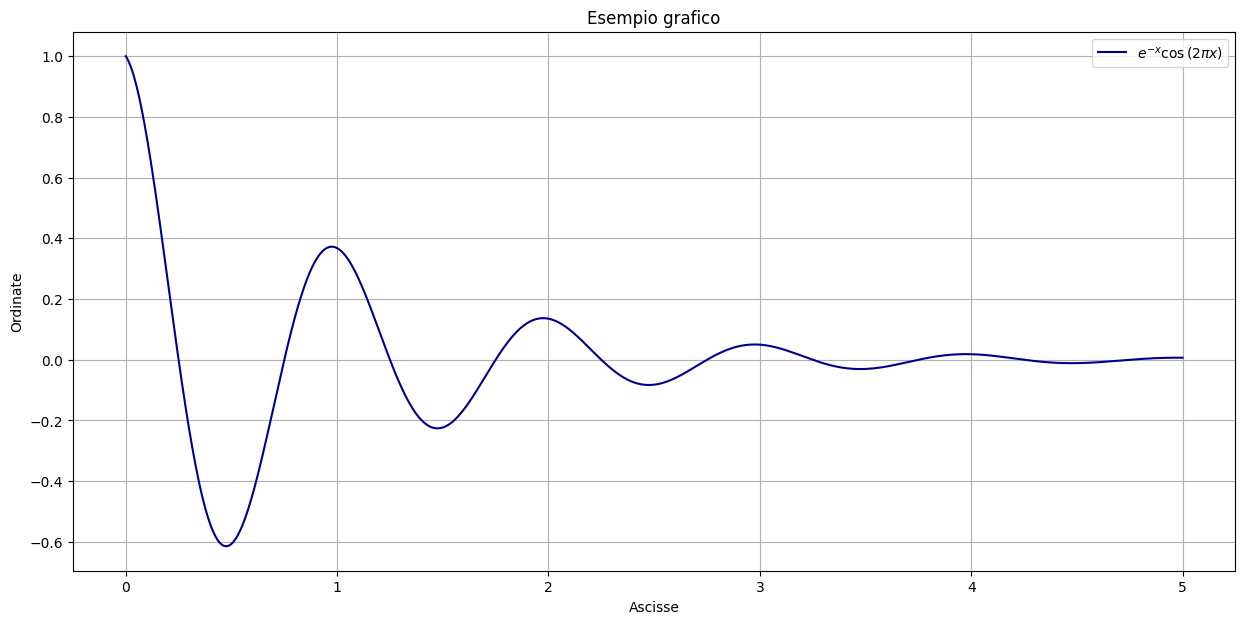

In [10]:
# Genero la funzione della quale voglio fare il plot
x = np.linspace(0, 5, 1000)
y = np.exp(-x) * np.cos(2*np.pi*x)


# Creo grafico e abbellisco come necessario
fig = plt.figure(figsize = (15, 7))
plt.plot(x, y, color = "darkblue", label = r"$e^{-x}\cos{\left(2\pi x\right)}$")

plt.title("Esempio grafico")
plt.ylabel("Ordinate")
plt.xlabel("Ascisse")

plt.legend(loc="best")
plt.grid(True)
plt.show()

<h1 style="color: blue; font-size:50px;"> Esercizio 4 - Scatter plot</h1>

L'obiettivo di questo esercizio è di sviluppare ulteriori competenze riguardanti l'utilizzo della libreria Matplotlib. In particolare verranno utilizzate le funzioni 

```python
np.loadtxt("percorso file")
plt.savefg("nome immagine")
```

che consentono rispettivamente di leggere dei dati da file e di salvare l'ouput come se fosse un'immagine (si noti infatti l'estensione .png). La funzionalità per creare lo scatterplot è

```python
plt.scatter(x, y, ...)
```

alla quale vanno associate tutte le altre specifiche presentate nell'esercizio precedente in modo da formattare al meglio l'ouput.

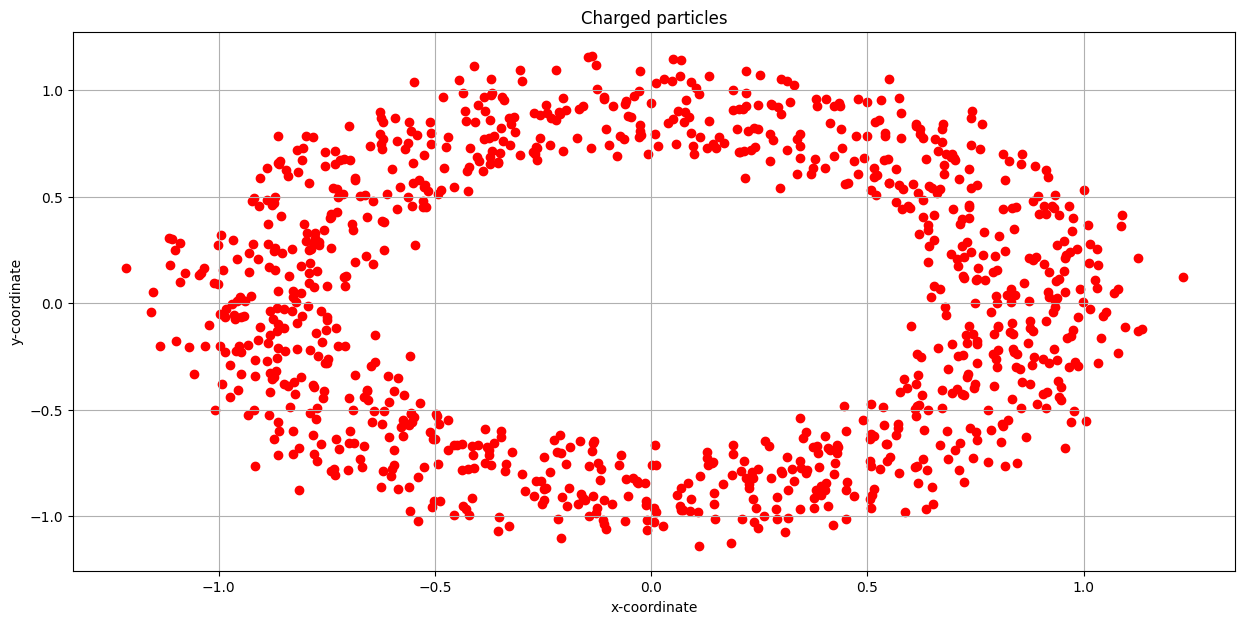

In [16]:
dati = np.loadtxt("Dati/Esercitazione2/data4.dat")

fig = plt.figure(figsize = (15, 7))
plt.scatter(dati[:, 0], dati[:, 1], color = "red")

plt.title("Charged particles")
plt.ylabel("y-coordinate")
plt.xlabel("x-coordinate")
plt.grid(True)

plt.savefig("Immagini/Esercitazione2/output4.png")
plt.show()

<h1 style="color: blue; font-size:50px;"> Esercizio 5 - Plot di funzioni</h1>

Anche questo esrcizio è incentrato sull'utilizzo di matplotlib. In particolare viene studiata la funzione 

$$
f\left(x\right)\,=\,-\frac{\sin{\left(x^2\right)}}{x}\,+\,0.01x^2
$$

per $x\,\in\,\left\{-3,\,3\right\}$. I valori generati sono stampati a file mediante la procedura

```python
with open("Dati/Esercitazione2/output5.dat", "w") as file:
    for i, posx in enumerate(x):
        funzx = fx[i]
        file.write(f"{posx}\t{funzx}\n")
```

dove ```open(...)``` indica il percorso del file e la modalità di utilizzo (in questo caso "w" per scrivere) e ```file.write(...)``` scrive ogni volta che viene chiamata una riga il cui contenuto è specificato come stringa fra le parentesi tonde. Per quanto riguarda matplotlib viene introdotta una nuova funzione, che limita l'estensione degli assi. Essa si chiama

```python
plt.xlim(...)
```

della quale chiaramente esiste anche la variante per l'asse y, la quale si chiamerà ```plt.ylim()```.

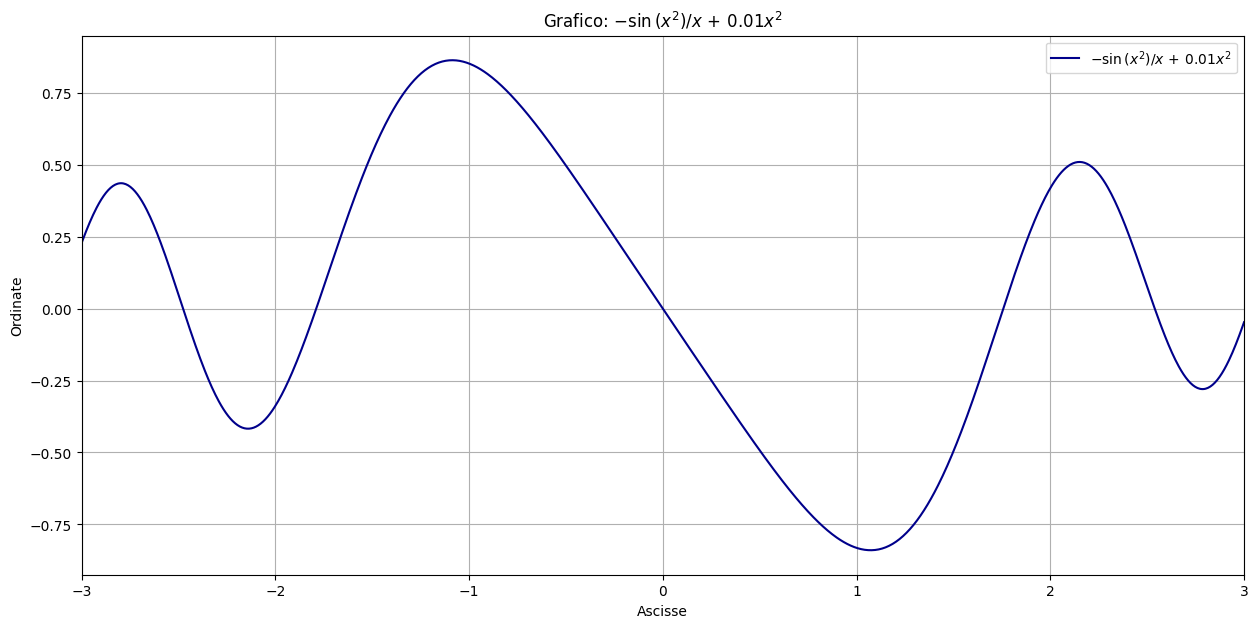

In [25]:
def funx(x):
    # Funzione target
    return -np.sin(x*x)/x + 0.01 * x*x

# Calcolo della funzione
x = np.linspace(-3, 3, 1000)
fx = funx(x) 

# Creazione file di output con colonne: x, f(x)
with open("Dati/Esercitazione2/output5.dat", "w") as file:
    for i, posx in enumerate(x):
        funzx = fx[i]
        file.write(f"{posx}\t{funzx}\n")


# Creazione grafico output
fig = plt.figure(figsize=(15, 7))
plt.plot(x, fx, color = "darkblue", label = r"$-\sin{\left(x^2\right)}/x\,+\,0.01x^2$")

plt.title(r"Grafico: $-\sin{\left(x^2\right)}/x\,+\,0.01x^2$")
plt.ylabel("Ordinate")
plt.xlabel("Ascisse")
plt.xlim(-3, 3)

plt.legend(loc="best")
plt.grid(True)

plt.savefig("Immagini/Esercitazione2/output5.png")
plt.show()

<h1 style="color: blue; font-size:50px;"> Esercizio 6 - Pandas basics</h1>

Pandas è una libreria Python per la gestione e l’analisi di dati strutturati, come quelli appartenenti a file CSV, Excel o tabelle. Le strutture dati principali fornite da Pandas sono

1. **Serie:** è un vettore mono-dimensionale con label che può contenere ogni tipo di dati (interi, stringhe, floating point, oggetti del Python, ...)

2. **DataFrame:** è una tabella costituita da colonne contenenti dati di tipi potenzialmente differenti.


<br>
<br>

#### Series

L'inizializzazione è il processo in cui ad ogni dato viene associata una label. Un esempio è il seguente:


```python
# Da una lista
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

# Da un dizionario
s2 = pd.Series({'x': 1, 'y': 2, 'z': 3})
```

In questo caso ad ogni valore generato dal processo casuale viene associata una flag (lettera fra a ed e, chiaramente in base all'ordine di estrazione). Se provassimo a stampare la lista inizializzata con il primo metodo otterremmo  

```python
# Output che si ottiene stampando serie
a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
e    1.212112
dtype: float64
```

Le operazioni principali sono:

<center>

|   Funzione    |    Utilità     |
|---------------|----------------|
|   .values	    | restituisce i valori come array |
|   .index	    | restituisce o imposta l'indice |
|   .describe()	| statistiche riassuntive |
| s[i] / s['etichetta']	| accesso tramite posizione o indice |
| .apply(func)	| applica una funzione elemento per elemento |
| .drop(labels)	| rimuove elementi con quegli indici |
| .replace(old, new) | sostituisce valori |
</center>

<br>

Altre operazioni, come ```.shape, .mean, .sum``` ed altre di questo genere sono in comune con quelle note per gli np-array.



<br>
<br>

#### DataFrame

Un DataFrame è una struttura dati bidimensionale etichettata con colonne di tipi potenzialmente diversi. È generalmente l'oggetto pandas più comunemente utilizzato. L'inizializzazione può avvenire in diversi modi, infatti

```python
#------------------------------#
#    Da lista con etichette    #
#------------------------------#
data = [
    ['Anna', 23],
    ['Luca', 30],
    ['Marco', 28]
]

df = pd.DataFrame(data, columns=['Nome', 'Età'])


#------------------------------#
#    Da dizionario di liste    #
#------------------------------#
df = pd.DataFrame({
    'Nome': ['Anna', 'Luca', 'Marco'],
    'Età': [23, 30, 28],
    'Città': ['Roma', 'Milano', 'Torino']
})
```

sono entrambe procedure valide. I metodi principali sono
<center>

|   Funzione    |    Utilità     |
|---------------|----------------|
|   .head(n)	| restituisce prime n righe dataframe |
|   .tail(n)    | restituisce ultime n righe dataframe |
|   .index	    | restituisce o imposta l'indice |
|   .columns    | indici per riconoscere le colonne |
|   .describe()	| statistiche riassuntive |
|   .mean()     | valuta la media |
|   .dropna()	| rimuove elementi Nana |
|   ["label"]   | restituisce serie (colonna) |
|   [0:2]       | restituisce le prime due righe |
</center>


In [41]:
# Importo dataframe con python
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                        na_values='?', comment='\t',
                        sep=' ', skipinitialspace=True)


# Valuto la media delle colonne
print("Valori medi di ogni colonna\n\n", raw_dataset.mean())

# Filtro risultati (numero cilindri uguale 3)
mask = raw_dataset["Cylinders"] == 3
print("\n\nUnici elementi con 3 cilindri")
raw_dataset[mask]

Valori medi di ogni colonna

 MPG               23.514573
Cylinders          5.454774
Displacement     193.425879
Horsepower       104.469388
Weight          2970.424623
Acceleration      15.568090
Model Year        76.010050
Origin             1.572864
dtype: float64


Unici elementi con 3 cilindri


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
71,19.0,3,70.0,97.0,2330.0,13.5,72,3
111,18.0,3,70.0,90.0,2124.0,13.5,73,3
243,21.5,3,80.0,110.0,2720.0,13.5,77,3
334,23.7,3,70.0,100.0,2420.0,12.5,80,3


<h1 style="color: blue; font-size:50px;"> Esercizio 7 - Numpy fit</h1>

L'obiettivo di questo esercizio è effettuare un fit utilizzando Numpy. L'esercizio è strutturato in 3 passi:

1. valutazione della funzione target ed aggiunta di rumore

2. proposta di un modello polinomiale di grado variabile

3. osservare il risultato per via visiva

La funzione utilizzata è ```polifit``` di numpy, che determina i coefficienti del modello polinomiale di grado specificato che meglio approssimi i dati target. L'ottimizzazione avviene per mezzo del metodo dei minimi quadrati. Viene utilizzato anche il metodo ```poly1d()```, per definire i modelli polinomiali una volta effettuato il fit. Quello che si nota osservando l'output grafico è che il polinomio di grado 15 è un modello troppo complesso per descrivere la casistica in analisi, dato che è evidente come in alcune regioni impari dal rumore gaussiano presente sui dati.

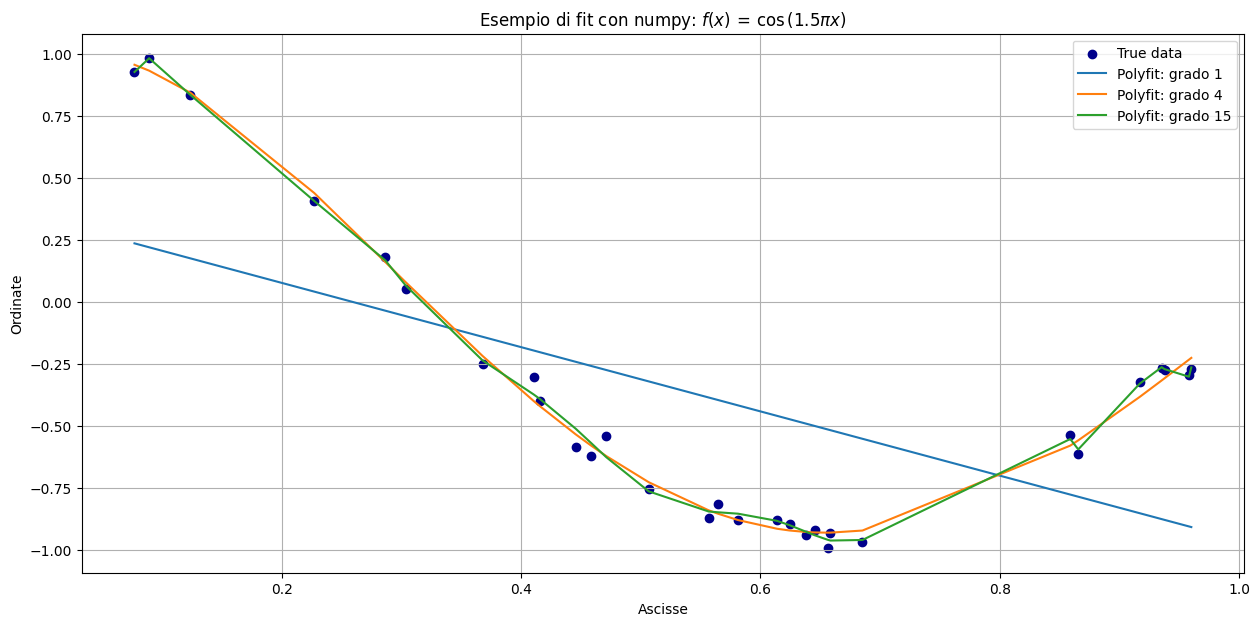

In [60]:
def true_func(x):
    # Funzione vera (che sarà target nostro fit)
    return np.cos(1.5*np.pi*x)


# Genero punti e aggiungo rumore
x = np.sort(np.random.uniform(0, 1, size = 30))
targetval = true_func(x) + np.random.uniform(-0.1, 0.1, size = 30)


# Stampo raw data
fig = plt.figure(figsize=(15, 7))
plt.scatter(x, targetval, color = "darkblue", label = "True data")


# Faccio e stampo fit
degs = [1, 4, 15]
for i in degs:
    coeffs = np.polyfit(x, targetval, i)
    fit_fn = np.poly1d(coeffs)
    plt.plot(x, fit_fn(x), label = f"Polyfit: grado {i}")


plt.title(r"Esempio di fit con numpy: $f(x)\,=\,\cos{\left(1.5\pi x\right)}$")
plt.ylabel("Ordinate")
plt.xlabel("Ascisse")

plt.legend(loc = "best")
plt.grid(True)
plt.show()